# [Fall 2022] CS 4361 / 5361 - Decision Trees

## **Before you start**

Make a copy of this Colab by clicking on File > Save a Copy in Drive

After making a copy, add your student id, last name, and first name to the title.

Credit: This notebook was originally created by Dr. Olac Fuentes. It was adapted by Dr. Diego Aguirre on 02/23/2022


In [ ]:
student_name = "Ricardo Sillas"
student_id = "88613474"
print("Identifying Information: ",student_name+","+student_id); # Don't change this line.

Identifying Information:  Ricardo Sillas,88613474


## **Decision Trees**

A decision tree is a classification model consisting of a flowchart-like structure in which each internal node represents an attribute, each branch represents an attribute value, and each leaf node represents a class label.


A decision tree: 

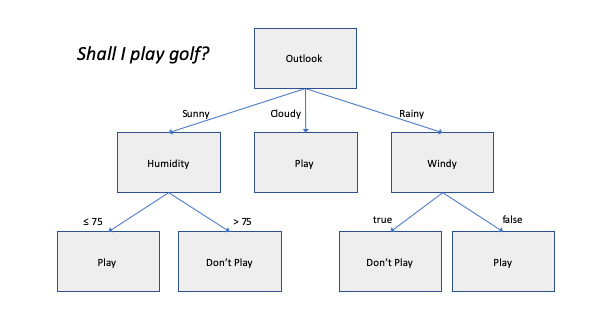

Decision trees offer a simple and human-understandable way of performing classifcation. 

In machine learning, we are interested in developing algorithms for infering decision trees from data. 

**When to use decision trees?**

<ul>
  <li>Instances describable by attribute-value pairs</li>
  <li>Target function is discrete valued (classification tasks)</li>
  <li>Disjunctive hypothesis may be required</li>
  <li>Training data may be noisy</li>
  <li>Data may contain missing attribute values</li>
  <li>Model understandability by people may be required</li>
  <li>Target function may depend only on a small subset of attributes</li>
</ul>

Most commonly available implementations for learning learning decision trees from data are based on the ID3 algortihm introduced by Quinlan. https://link.springer.com/article/10.1007/BF00116251


Here's a description in Python-like pseudocode of the ID3 algorithm.

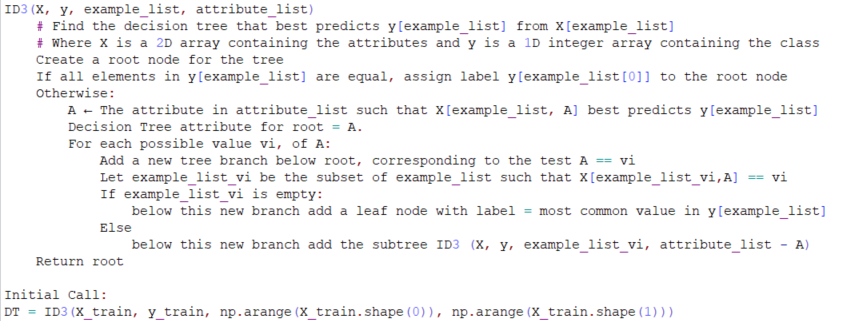

How do we find A?

A ← The attribute in attribute_list such that X[example_list, A] best predicts y[example_list]

Let's consider a binary classification case. 

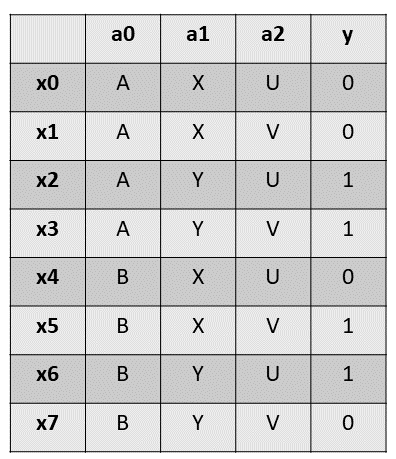

We want to build a decision tree to predict y from given examples x0,...,x7 with attribute values a0, a1, a2.

Thus X_train would be the array consisting off all rows the the first three columns in the table and y_train would be the last columns in the table.

The call to ID3 would be:

DT = ID3(X_train, y_train, [0,1,2,3,4,5,6,7],[0,1,2])

Which attibute should we choose for the root of the decision tree?

y_train[example_list] has 4 elements belonging to class 1 and 4 elements belonging to class 0. 

We will represent this as [4+, 4-]

Suppose we have a classifier that simply predicts the majority class for all test examples.  For the data above, such classifier would have an accuracy of 0.5

Now consider the splits we would obtain with each of the attributes a0, a1, a2.

If we split the data according to **a0**:

The labels (or y values) of examples for which a0==A are:

[2+,2-]

so the accuracy of a majority classifier would be 0.5 on this subset of the data.

The labels (or y values) of examples for which a0==B are:

[2+,2-]

so the accuracy of a majority classifier would also be 0.5 on this subset of the data.

If we split the data according to **a1**:

The labels (or y values) of examples for which a1==X are:

[1+,3-]

so the accuracy of a majority classifier would be 0.75 on this subset of the data.

The labels (or y values) of examples for which a1==Y are:

[3+,1-]

so the accuracy of a majority classifier would also be 0.75 on this subset of the data.

If we split the data according to **a2**:

The labels (or y values) of examples for which a2==U are:

[2+,2-]

so the accuracy of a majority classifier would be 0.5 on this subset of the data.

The labels (or y values) of examples for which a2==V are:

[2+,2-]

so the accuracy of a majority classifier would also be 0.5 on this subset of the data.

Intuitively, it seems like a1 is the best attribute for the root of the decision tree.

**Entropy and information gain**

Formally, we chose the attribute that results in the largest information gain. 

The gain of attribute A over datset S is given by:

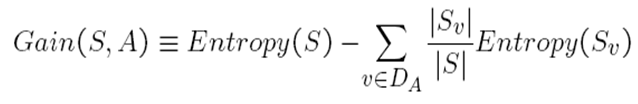

where *|S|* is the cardinality (or size) of *S*, *Sv* is the subset of *S* consisting of the labels of examples for which attribute *A* has value *v*. 

Let *S* be a set of binary labels. The entropy of *S* is given by:

*ent(S) = - p(0) log2 p(0) - p(1) log2 p(1)*

where *p(0)* is the probability that a randomly-chosen element of *S* will have value *0*, or equivalently, the number of elements of *S* that have value *0* divided by the number of elements of *S*. 


In [ ]:
import numpy as np
def entropy(S):
  p1 = np.sum(S)/len(S)
  p0 = 1-p1
  if p0==0 or p1==0:
    return 0
  return -p0*np.log2(p0) - p1*np.log2(p1)

In [ ]:
S = [0,0,0,0,1,1,1,1]
entropy(S)

1.0

In [ ]:
S = [0,0,0,0]
entropy(S)

0

In [ ]:
S = [1,1,1,1]
entropy(S)

0

In [ ]:
S = [0,1,1,1,1]
entropy(S)

0.7219280948873623

In [ ]:
S = [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
entropy(S)

0.18312206830137284

In [ ]:
def entropy_from_p1(p1):
  p0 = 1-p1
  if p0==0 or p1==0:
    return 0
  return -p0*np.log2(p0) - p1*np.log2(p1)

Text(0, 0.5, 'entropy')

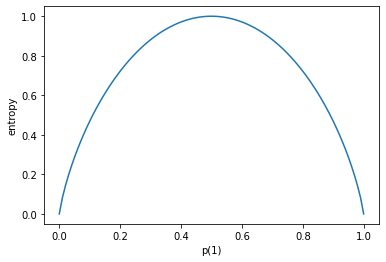

In [ ]:
import matplotlib.pyplot as plt

p1 = np.linspace(0,1,100) # Generates 100 values from 0 to 1, unifirmly spaced

ent = []
for p in p1:
  ent.append(entropy_from_p1(p))

plt.plot(p1,ent)
plt.xlabel('p(1)')
plt.ylabel('entropy')


For the example above:

For attribute **a0**:

Gain((X,y),a0) = entropy(0.5) - 4/8 entropy(0.5) - 4/8 entropy(0.5) 

In [ ]:
G = entropy_from_p1(0.5) - (4/8)*entropy_from_p1(0.5) - (4/8)*entropy_from_p1(0.5) 
print(G)

0.0


For attribute **a1**:

Gain((X,y),a1) = entropy(0.5) - 4/8 entropy(0.25) - 4/8 entropy(0.75) 

In [ ]:
G = entropy_from_p1(0.5) - (4/8)*entropy_from_p1(0.25) - (4/8)*entropy_from_p1(0.75)
print(G) 

0.1887218755408671


For attribute **a2**:

Gain((X,y),a0) = entropy(0.5) - 4/8 entropy(0.5) - 4/8 entropy(0.5) 

In [ ]:
G = entropy_from_p1(0.5) - (4/8)*entropy_from_p1(0.5) - (4/8)*entropy_from_p1(0.5) 
print(G)

0.0


Thus **a1** is the attribute that maximizes information gain.

For the recursive calls, we would split the dataset according to **a1**. 

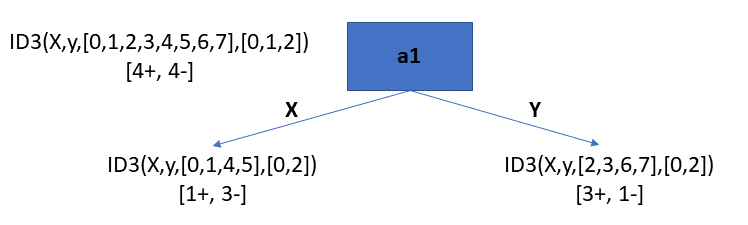

Using the table repesentation of the data received by ID3, we can visualize how data are split, trying to separe the data into subsets that have the same y value. 

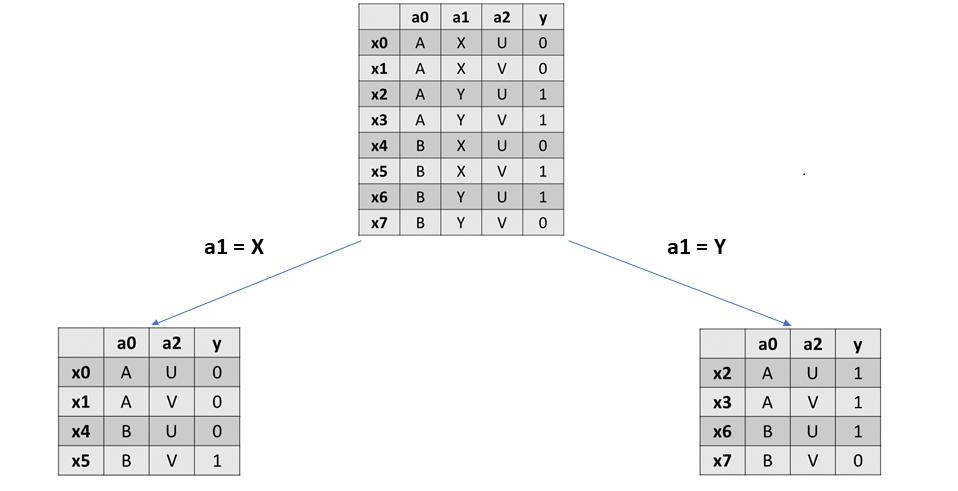

Considering the left child of the root, we need to chose between attributes **a0** and **a2**.

For **a0**:




In [ ]:
G = entropy_from_p1(0.25) - (2/4)*entropy_from_p1(0) - (2/4)*entropy_from_p1(0.5) 
print(G)

0.31127812445913283


For **a2**:

In [ ]:
G = entropy_from_p1(0.25) - (2/4)*entropy_from_p1(0) - (2/4)*entropy_from_p1(0.5) 
print(G)

0.31127812445913283


Since we have a tie, we can pick arbitrarily; we choose **a0**:

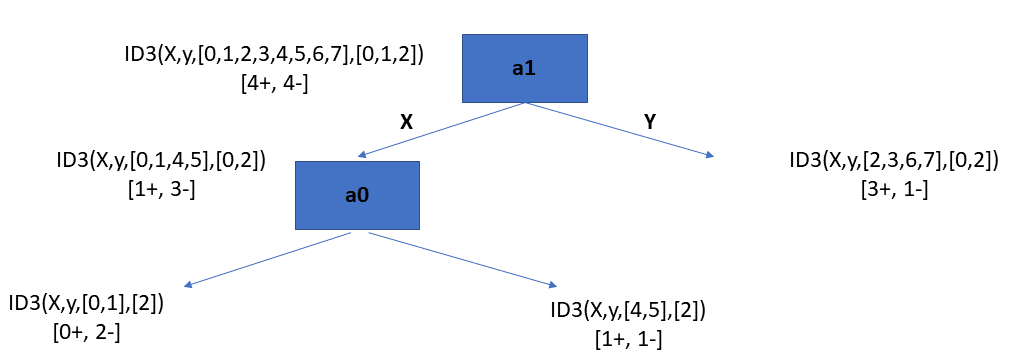

Visualizing data using tables:

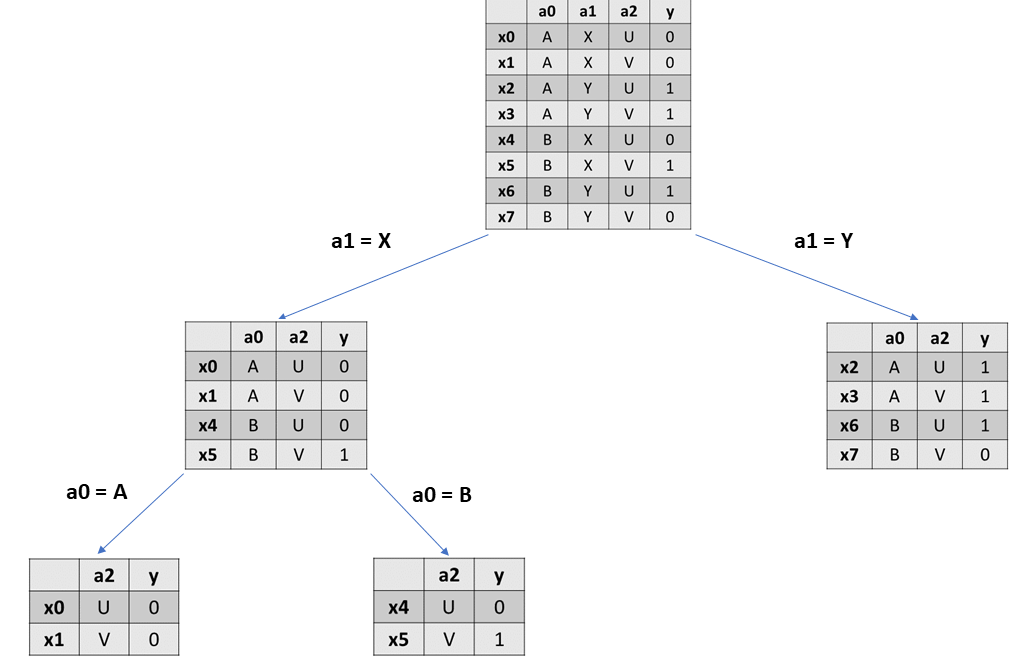

In the next recursive call, ID3((X,y),[0,1],[2]), the base case applies, since all examples belong to the same class. Thus we return a leaf node with label 0. 

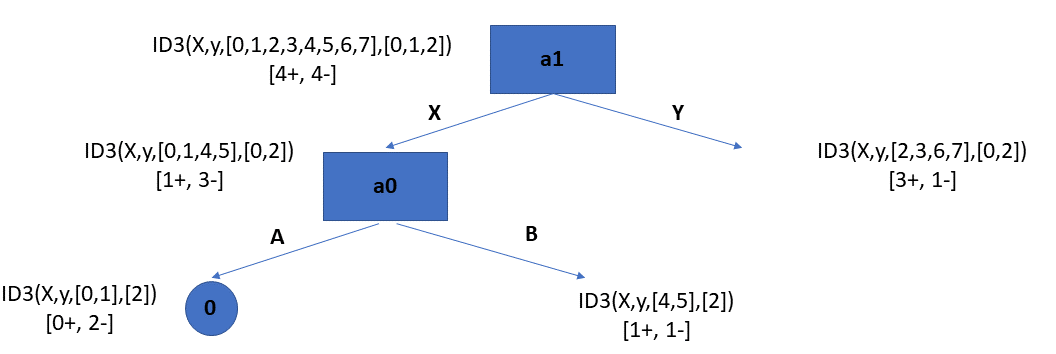

In the next recursive call, ID3((X,y),[4,5],[2]), we split accoring to the only attribute left and obtain:

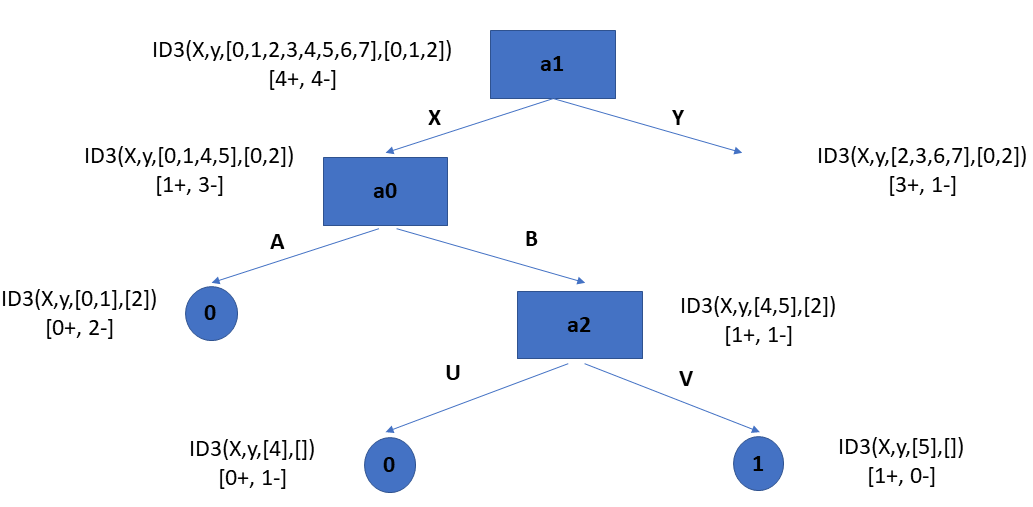

After 

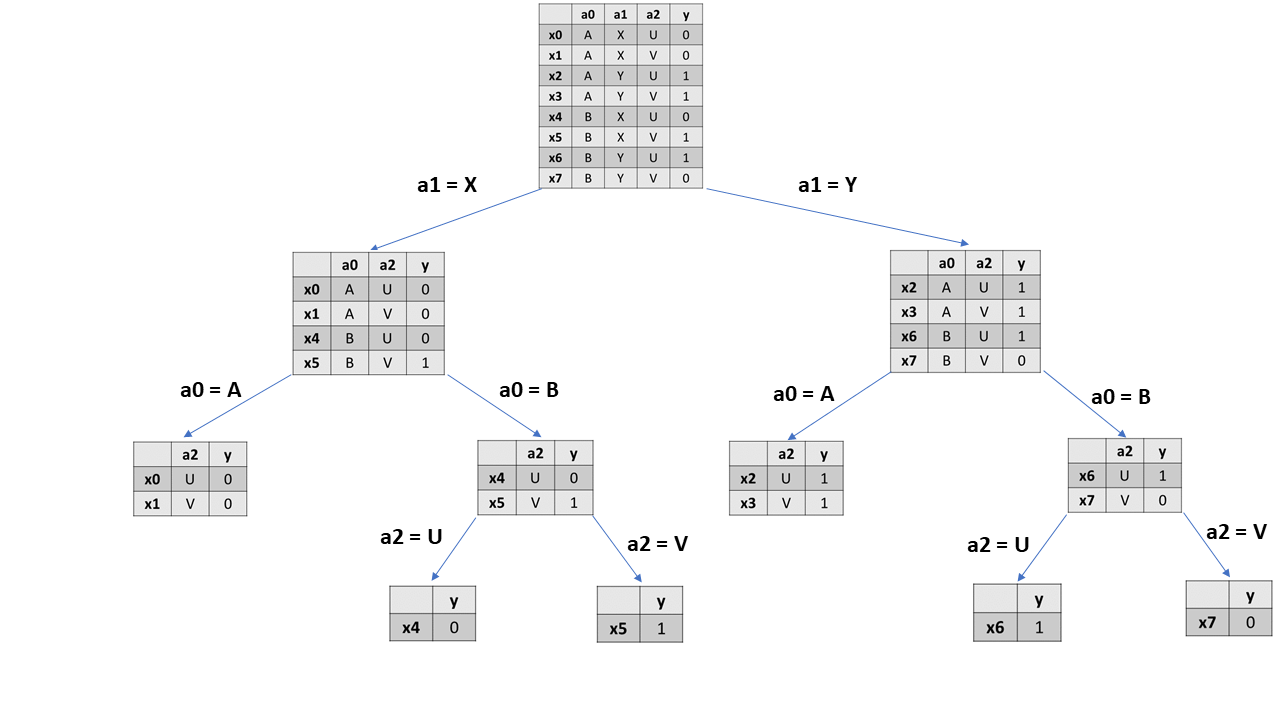

# **Decision trees with sklearn**

Sklearn provides an implementation of decision trees based on ID3. The documentation can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
from sklearn.tree import DecisionTreeClassifier


The implementation only allows for numeric data. To reproduce the results above, we need to transform our dataset. Since each attribute has two possible values, we will use 0 and 1 in our representation. We will replace A, X and U by 0 and B,Y and V by 1.

In [ ]:
X= np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
y = np.array([0,0,1,1,0,1,1,0])
print(X)
print(y)

[[0 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
[0 0 1 1 0 1 1 0]


Since we use entropy as our sppliting criterion, we will use that for this tree. We can also restrict the maximum depth of nodes in the tree. When ID3 reaches the maximum depth, it stops splitting and returns a leaf with the most common label in the data it receives.

In [ ]:
max_depth=1
model = DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)

We will also use sklearn and matplotlib functions to display the tree.

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

Text(0.5, 0.98, 'Decision tree with max_depth =1')

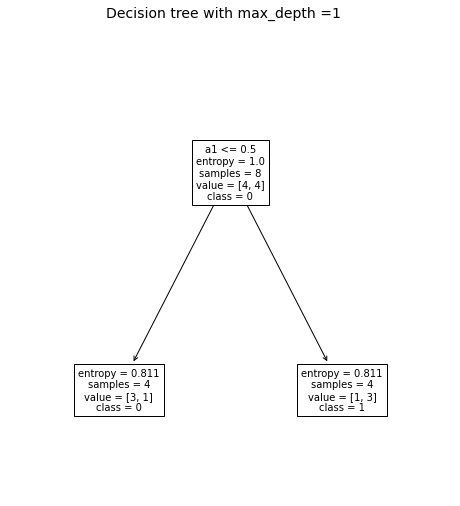

In [ ]:
max_depth=1
model = DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
model = model.fit(X, y)
fig, ax = plt.subplots(figsize=(8,8))
tree.plot_tree(model, feature_names=['a0','a1','a2'],fontsize=10, ax=ax,class_names=['0','1'])
fig.suptitle('Decision tree with max_depth ={}'.format(max_depth), fontsize=14)

[link text](https://)We can see that the attribute choice (a1) matches our example. We can also verify that the entropy calculations match ours.

In [ ]:
entropy_from_p1(0.5)

1.0

In [ ]:
entropy_from_p1(0.75)

0.8112781244591328

Let's now increase the maximum depth.

Text(0.5, 0.98, 'Decision tree with max_depth =2')

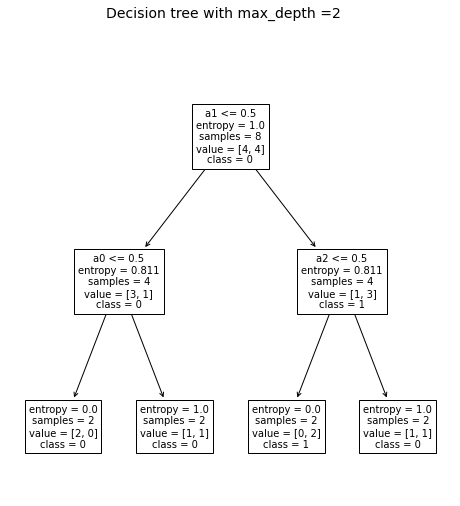

In [ ]:
max_depth=2
model = DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
model = model.fit(X, y)
fig, ax = plt.subplots(figsize=(8,8))
tree.plot_tree(model, feature_names=['a0','a1','a2'],fontsize=10, ax=ax,class_names=['0','1'])
fig.suptitle('Decision tree with max_depth ={}'.format(max_depth), fontsize=14)

As in our example, two of the leaves have 0 entropy, with all examples belonging to the same class, so not further splits would happen even if we increased the depth. 

Now let's increase the maximum depth to 3.

Text(0.5, 0.98, 'Decision tree with max_depth =3')

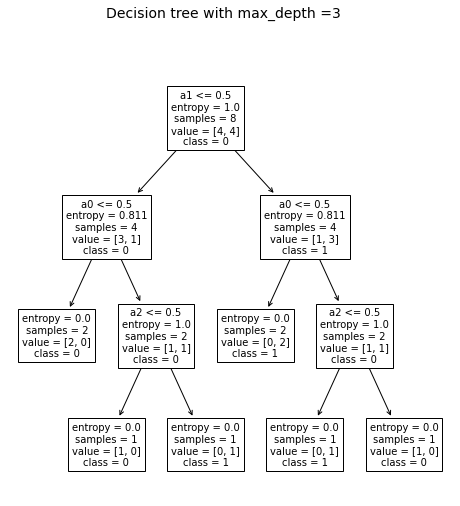

In [ ]:
max_depth=3
model = DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
model = model.fit(X, y)
fig, ax = plt.subplots(figsize=(8,8))
tree.plot_tree(model, feature_names=['a0','a1','a2'],fontsize=10, ax=ax,class_names=['0','1'])
fig.suptitle('Decision tree with max_depth ={}'.format(max_depth), fontsize=14)

This produces the same tree we build in our example.

Notice that increasing the maximum depth further has no effect, since all leaves have 0 entropy.

Text(0.5, 0.98, 'Decision tree with max_depth =10')

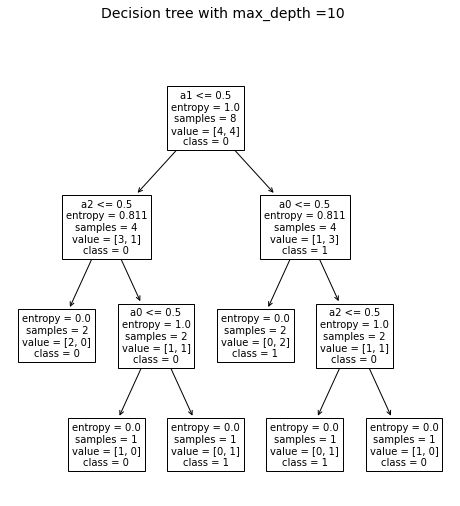

In [ ]:
max_depth=10
model = DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
model = model.fit(X, y)
fig, ax = plt.subplots(figsize=(8,8))
tree.plot_tree(model, feature_names=['a0','a1','a2'],fontsize=10, ax=ax,class_names=['0','1'])
fig.suptitle('Decision tree with max_depth ={}'.format(max_depth), fontsize=14)

How does the decision tree classifier perform on the MNIST dataset? 

Since the algorithm bases its decision on just a few attributes, we wouldn't expect its performance to match that of other algorithms that use all attributes, as k-nn.

In [ ]:
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = np.float32(x_train/255).reshape(x_train.shape[0],-1)
x_test = np.float32(x_test/255).reshape(x_test.shape[0],-1)


In [ ]:
model = DecisionTreeClassifier(criterion='entropy')
model = model.fit(x_train, y_train)
pred = model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(f'Accuracy {accuracy:.4}')
cm = confusion_matrix(y_test, pred)
print(cm)


Accuracy 0.887
[[ 921    0    9    3    2   17    9    6    6    7]
 [   1 1099    7    6    0    7    4    1    9    1]
 [   9    3  904   27    9   12   21   19   23    5]
 [   9    9   22  854    5   46    4   15   25   21]
 [   7    1   16    6  867    4   18   11   12   40]
 [  13    4    5   38    8  758   24    3   24   15]
 [  16    3   14    6   19   20  853    6   15    6]
 [   2    9   32   14   10    5    1  931    7   17]
 [  10    4   16   38   21   18   15    8  817   27]
 [   5    5    9   16   38   19    5   22   24  866]]


Let's replicate the experiment, but this time, we will use [gini](https://victorzhou.com/blog/gini-impurity/) instead of entropy.

In [ ]:
model = DecisionTreeClassifier(criterion='gini')
model = model.fit(x_train, y_train)
pred = model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(f'Accuracy {accuracy:.4}')
cm = confusion_matrix(y_test, pred)
print(cm)

Accuracy 0.8762
[[ 912    0   11    7    3   14   12    4   10    7]
 [   1 1090   11    6    2    4    8    5    6    2]
 [  13   10  881   32   14   13    8   26   25   10]
 [   8    7   28  858    7   45    3   11   24   19]
 [   6    2    7    6  861   11   16    7   21   45]
 [  11    9    5   42   10  749   22    6   21   17]
 [  15    5   13    8   19   21  846    1   22    8]
 [   2    7   22   20    8    7    3  930    8   21]
 [  11    7   28   35   29   21   16   10  786   31]
 [  14    3   13   22   41   10    7   26   24  849]]


Let's try now with a different dataset. The DOH dataset contains samples describing network traffic packets that must be classified as benign or malicious. Download *doh_dataset.zip* from the class website (Blackboard) and upload it here by running the following code cell.

In [ ]:
from google.colab import files
import os

if not os.path.isfile("doh_dataset.zip"):
  files.upload() # If this doesn't work, try using Google Chrome

In [ ]:
import pandas as pd
df = pd.read_csv("doh_dataset.zip", compression='gzip')

In [ ]:
df

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,192.168.20.191,176.103.130.131,50749,443,2020-01-14 15:49:11,95.081550,62311,655.342703,65358,687.388878,...,0.574626,0.001053,0.032457,0.027624,0.026854,0.026822,0.071187,0.024715,1.174948,Benign
1,192.168.20.191,176.103.130.131,50749,443,2020-01-14 15:50:52,122.309318,93828,767.136973,101232,827.672018,...,0.509047,0.001170,0.034200,0.024387,0.021043,0.026981,0.293297,-0.075845,1.402382,Benign
2,192.168.20.191,176.103.130.131,50749,443,2020-01-14 15:52:55,120.958413,38784,320.639127,38236,316.108645,...,0.732636,0.000785,0.028021,0.029238,0.026921,0.026855,0.248064,0.085061,0.958348,Benign
3,192.168.20.191,176.103.130.131,50749,443,2020-01-14 15:54:56,110.501080,61993,561.017141,69757,631.278898,...,0.646859,0.000411,0.020274,0.019925,0.019268,0.026918,0.097199,-0.344926,1.017535,Benign
4,176.103.130.131,192.168.20.191,443,50749,2020-01-14 15:56:46,54.229891,83641,1542.341289,76804,1416.266907,...,0.507334,0.079079,0.281209,0.025930,0.000047,0.000021,0.276133,0.092135,10.844829,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39719,192.168.20.212,8.8.4.4,38452,443,2020-03-19 00:30:35,120.233059,51233,426.114086,87792,730.181871,...,0.723993,0.000318,0.017822,0.013487,0.015228,0.015268,-0.293038,-0.099924,1.321399,Malicious
39720,8.8.4.4,192.168.20.212,443,38452,2020-03-19 00:32:36,120.624300,75394,625.031606,42807,354.878743,...,0.575252,0.227008,0.476454,0.367115,0.000055,0.000032,2.311206,0.770449,1.297831,Malicious
39721,8.8.4.4,192.168.20.212,443,38452,2020-03-19 00:34:36,120.927652,75219,622.016543,42633,352.549639,...,0.583627,0.227422,0.476888,0.368436,0.000066,0.000027,2.317335,0.772527,1.294359,Malicious
39722,8.8.4.4,192.168.20.212,443,38452,2020-03-19 00:36:37,120.732247,73750,610.855855,43319,358.802235,...,0.583513,0.220860,0.469958,0.362321,0.000060,0.000032,2.312511,0.770897,1.297076,Malicious


Let's remove non-numeric features and features with missing values, convert labels to binary, and split data into training and test sets. 


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop rows that have a NaN in them
df = df.dropna()

# Remove features we don't want
# In this case, we remove non-float data as that will mess up the student's code
df.pop('TimeStamp')
df.pop('SourceIP')
df.pop('DestinationIP')

# Make a copy here just for visualization purposes
original_df = df.copy()

# Extract the labels from the dataframe and encode them to integers
df_labels = df.pop('Label')
label_encoder = LabelEncoder()
df_labels = label_encoder.fit_transform(df_labels)

# Prepare arrays to split into training and testing sets
x_features = df.values
y_labels = np.array(df_labels).T

# Split into training (70%) and testing (30%)
x_train, x_test, y_train, y_test = train_test_split(x_features, y_labels, train_size=0.7, random_state=1738, shuffle=True)

print(f"Training Set={x_train.shape}, Testing Set={x_test.shape}")



Training Set=(27806, 31), Testing Set=(11918, 31)


In [ ]:
label_encoder.classes_

array(['Benign', 'Malicious'], dtype=object)

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)

accuracy = accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy:.6}')

Accuracy: 0.998825


Now let's try to visualize some trees by restricting the maximum depth. 

First we need to retrieve the attribute names and class names to be displaying in the trees.

In [ ]:
feature_names = list(df.columns)
class_names = label_encoder.classes_

Now let's build and display the trees. 

Max_depth = 1;, accuracy =  0.8072
Max_depth = 2;, accuracy =  0.9555
Max_depth = 3;, accuracy =  0.9811
Max_depth = 4;, accuracy =  0.9901
Max_depth = 5;, accuracy =  0.9963


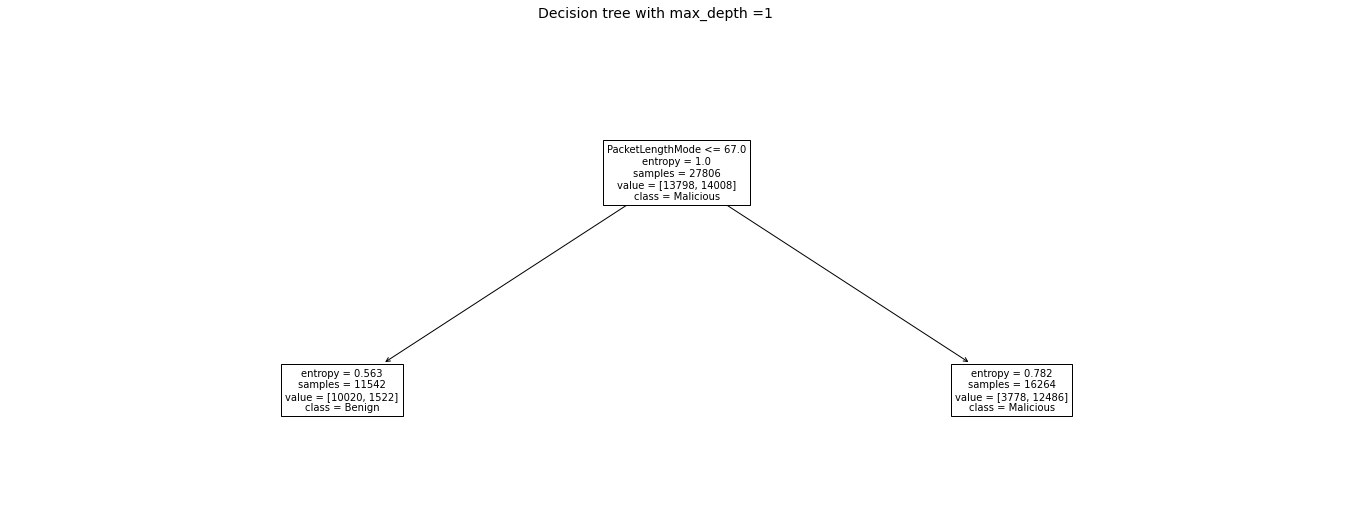

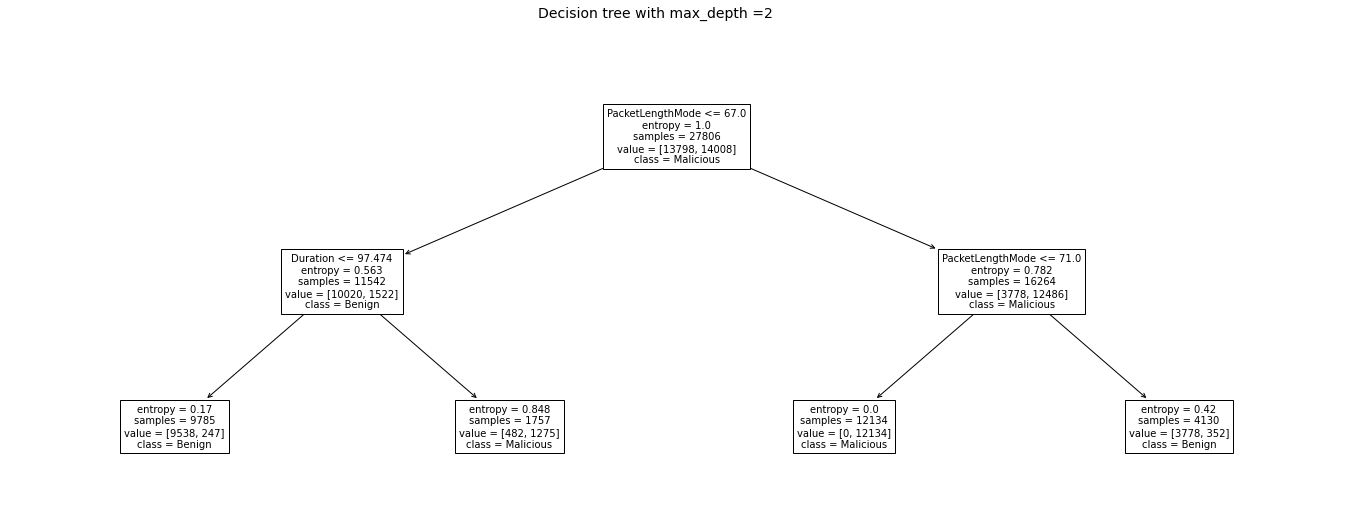

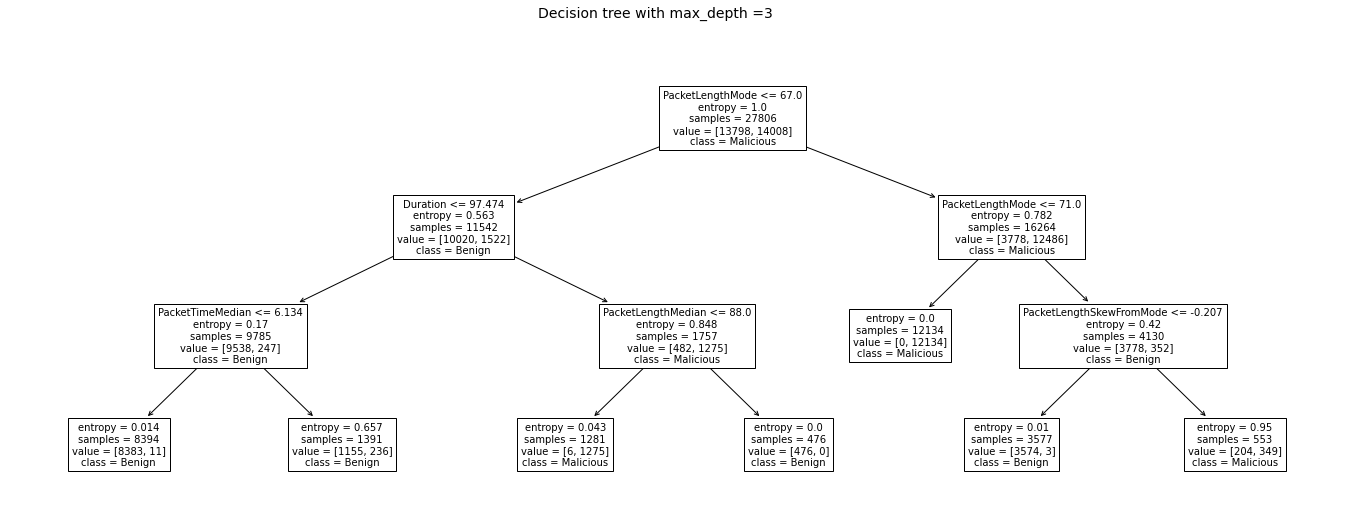

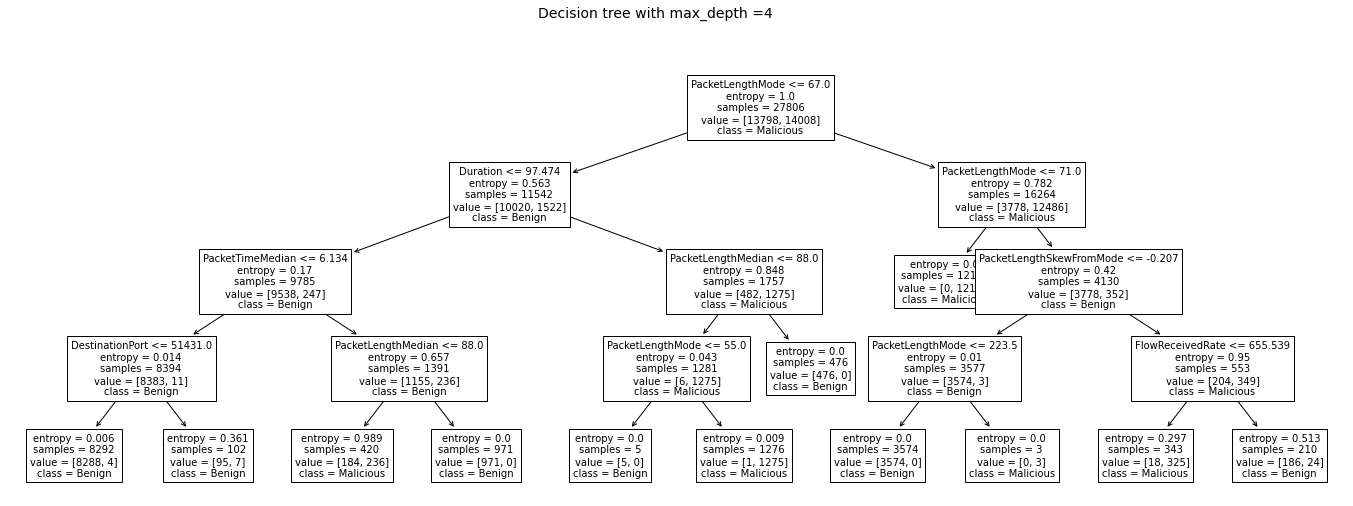

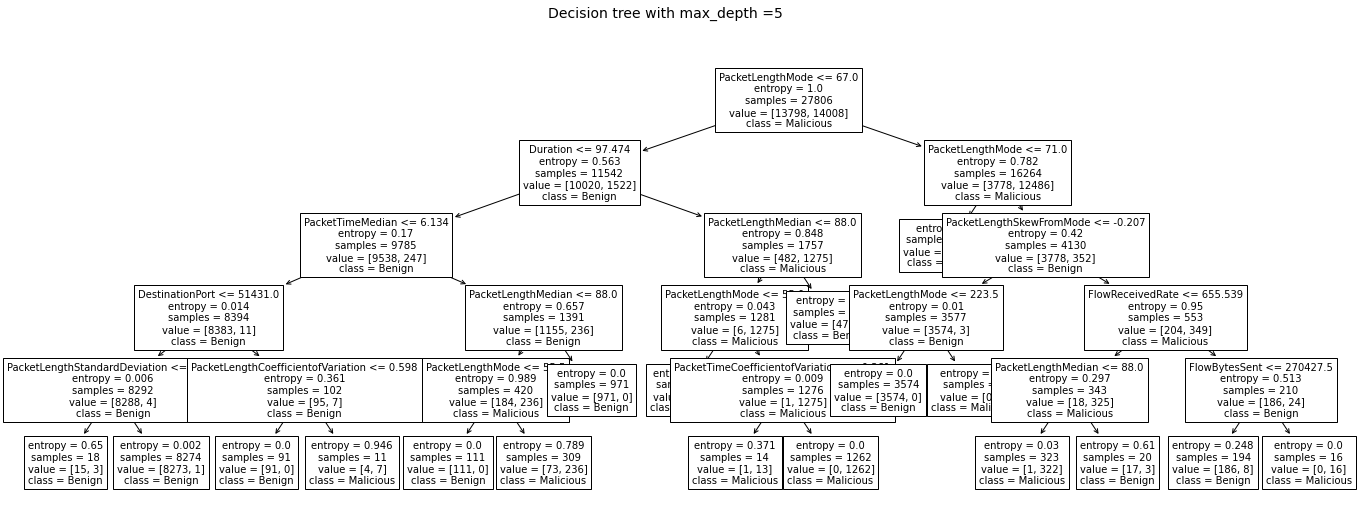

In [ ]:
for max_depth in range(1,6):
  model = DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  fig, ax = plt.subplots(figsize=(24,8))
  tree.plot_tree(model, feature_names=feature_names,fontsize=10, ax=ax,class_names=class_names)
  fig.suptitle('Decision tree with max_depth ={}'.format(max_depth), fontsize=14)
  accuracy = accuracy_score(y_test, pred)
  print('Max_depth = {};, accuracy = {:7.4f}'.format(max_depth,accuracy))


In [ ]:
max_depths = list(np.arange(1,25))+[None]
for max_depth in max_depths:
  model = DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, pred)
  print('Max_depth = {};, accuracy = {:7.4f}'.format(max_depth,accuracy))

Max_depth = 1;, accuracy =  0.8072
Max_depth = 2;, accuracy =  0.9555
Max_depth = 3;, accuracy =  0.9811
Max_depth = 4;, accuracy =  0.9901
Max_depth = 5;, accuracy =  0.9963
Max_depth = 6;, accuracy =  0.9982
Max_depth = 7;, accuracy =  0.9987
Max_depth = 8;, accuracy =  0.9990
Max_depth = 9;, accuracy =  0.9988
Max_depth = 10;, accuracy =  0.9989
Max_depth = 11;, accuracy =  0.9990
Max_depth = 12;, accuracy =  0.9992
Max_depth = 13;, accuracy =  0.9988
Max_depth = 14;, accuracy =  0.9988
Max_depth = 15;, accuracy =  0.9990
Max_depth = 16;, accuracy =  0.9989
Max_depth = 17;, accuracy =  0.9987
Max_depth = 18;, accuracy =  0.9990
Max_depth = 19;, accuracy =  0.9989
Max_depth = 20;, accuracy =  0.9991
Max_depth = 21;, accuracy =  0.9991
Max_depth = 22;, accuracy =  0.9987
Max_depth = 23;, accuracy =  0.9991
Max_depth = 24;, accuracy =  0.9989
Max_depth = None;, accuracy =  0.9988


Now let's try the default splitting criterion, Gini, instead of entropy.

In [ ]:
max_depths = list(np.arange(1,25))+[None]
for max_depth in max_depths:
  model = DecisionTreeClassifier(max_depth=max_depth)
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, pred)
  print('Max_depth = {};, accuracy = {:7.4f}'.format(max_depth,accuracy))

Max_depth = 1;, accuracy =  0.8072
Max_depth = 2;, accuracy =  0.9556
Max_depth = 3;, accuracy =  0.9829
Max_depth = 4;, accuracy =  0.9914
Max_depth = 5;, accuracy =  0.9950
Max_depth = 6;, accuracy =  0.9959
Max_depth = 7;, accuracy =  0.9969
Max_depth = 8;, accuracy =  0.9970
Max_depth = 9;, accuracy =  0.9973
Max_depth = 10;, accuracy =  0.9973
Max_depth = 11;, accuracy =  0.9979
Max_depth = 12;, accuracy =  0.9984
Max_depth = 13;, accuracy =  0.9984
Max_depth = 14;, accuracy =  0.9992
Max_depth = 15;, accuracy =  0.9989
Max_depth = 16;, accuracy =  0.9989
Max_depth = 17;, accuracy =  0.9988
Max_depth = 18;, accuracy =  0.9991
Max_depth = 19;, accuracy =  0.9987
Max_depth = 20;, accuracy =  0.9989
Max_depth = 21;, accuracy =  0.9991
Max_depth = 22;, accuracy =  0.9991
Max_depth = 23;, accuracy =  0.9988
Max_depth = 24;, accuracy =  0.9988
Max_depth = None;, accuracy =  0.9986


## Exercise: Do the following

1. Build a decision tree on the Fashion MNIST dataset (training dataset) using entropy as the criterion (do **not** limit the max_depth of the tree), and evalute the model on the test dataset (print the confusion matrix and accuracy).

2. Repeat 1, but use gini instead of entropy.

3. Find the best performing decision tree (**use accuracy - evaluated on the test dataset**) of depth of 20 or less, display it, and print the confusion matrix and accuracy on the test dataset. Use entropy.

4. Find the worst performing decision tree (**use accuracy - evaluated on the test dataset**) of depth at least 5 and at most 20 (inclusive), display it, and print the confusion matrix and accuracy on the test dataset. Use entropy.

5. Repeat 3, but use gini instead of entropy.

6. Repeat 4, but use gini instead of entropy.

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = np.float32(x_train/255).reshape(x_train.shape[0],-1)
x_test = np.float32(x_test/255).reshape(x_test.shape[0],-1)

In [ ]:
# For part 1

model = DecisionTreeClassifier(criterion='entropy')
model = model.fit(x_train, y_train)
pred = model.predict(x_test)

accuracy = accuracy_score(y_test, pred)
print(f'Accuracy {accuracy:.4}')

cm = confusion_matrix(y_test, pred)
print(cm)

Accuracy 0.8012
[[740   3  22  41   8   2 172   0   9   3]
 [  8 949   2  26   4   1   8   0   2   0]
 [ 22   1 679  14 151   0 124   0   8   1]
 [ 40  26  18 790  56   0  56   0  13   1]
 [  6   3 160  42 666   0 115   0   8   0]
 [  1   1   0   1   0 896   2  59  11  29]
 [145   7 115  36 105   1 567   0  23   1]
 [  0   0   0   0   0  53   0 881   6  60]
 [  6   0   8   6   5  12  13   9 937   4]
 [  0   1   0   1   1  19   0  66   5 907]]


In [ ]:
# For part 2

model = DecisionTreeClassifier(criterion='gini')
model = model.fit(x_train, y_train)
pred = model.predict(x_test)

accuracy = accuracy_score(y_test, pred)
print(f'Accuracy {accuracy:.4}')

cm = confusion_matrix(y_test, pred)
print(cm)

Accuracy 0.7912
[[735   5  28  37  12   2 171   2   8   0]
 [  8 945   6  19   6   0  12   0   3   1]
 [ 19   3 649  14 157   0 143   0  12   3]
 [ 51  29  14 786  49   2  54   0  14   1]
 [ 12   3 166  50 654   0 110   0   4   1]
 [  2   3   1   3   0 887   1  57  18  28]
 [150   9 138  37 102   4 542   1  16   1]
 [  0   0   0   0   0  42   0 890   6  62]
 [  7   3  14  11  10  15  18   9 911   2]
 [  1   0   0   0   0  19   1  62   4 913]]


In [ ]:
# Setting up for part 3 and 4
accuracy_list = []
model_list = []
for max_depth in range(1, 21):
  model = DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  accuracy_list.append(accuracy_score(y_test, pred))
  model_list.append(model)

In [ ]:
# To check the answers for part 3 and 4
print(accuracy_list)

[0.1997, 0.3431, 0.5127, 0.6686, 0.7048, 0.7341, 0.765, 0.7822, 0.8021, 0.8111, 0.8153, 0.8132, 0.8138, 0.8115, 0.8078, 0.8053, 0.8051, 0.8015, 0.8, 0.8028]


Accuracy:  0.8153

The best performing decision tree of depth of 20 or less is depth  11
Confusion matrix:
 [[826   4  13  43  10   3  92   0   9   0]
 [ 13 933   5  34   3   0  10   0   2   0]
 [ 13   0 698  11 186   1  82   0   8   1]
 [ 57  18  17 809  69   1  24   0   3   2]
 [  4   1 123  46 757   0  65   0   4   0]
 [  2   1   0   2   1 883   2  71   8  30]
 [193   5 138  34 116   1 493   0  20   0]
 [  0   0   0   0   0  41   0 922   4  33]
 [  8   0  15   2  11  11  12  12 926   3]
 [  0   0   1   1   0  17   0  71   4 906]]


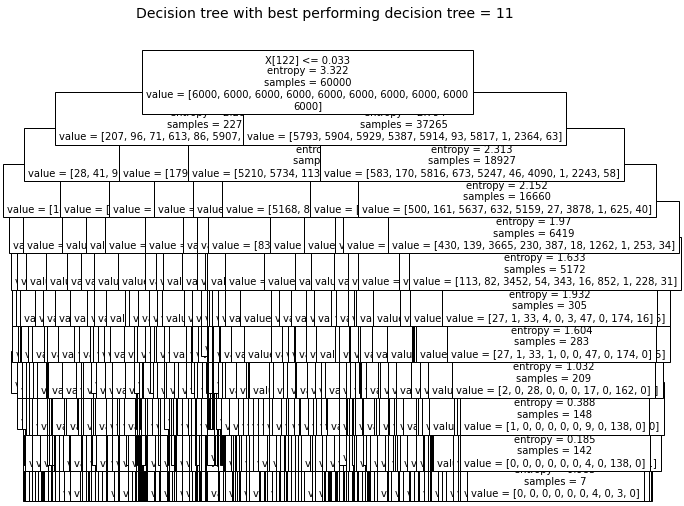

In [ ]:
# For part 3

best_performing = accuracy_list.index(max(accuracy_list))
print('Accuracy: ',accuracy_list[best_performing], end = '\n\n')
print('The best performing decision tree of depth of 20 or less is depth ', best_performing+1)

fig, ax = plt.subplots(figsize=(8,8))
tree.plot_tree(model_list[best_performing], fontsize=10)
fig.suptitle('Decision tree with best performing decision tree = {}'.format(best_performing+1), fontsize=14)

cm = confusion_matrix(y_test, model_list[best_performing].predict(x_test))
print('Confusion matrix:\n', cm)

Accuracy:  0.7048

The worst performing decision tree of depth of at least 5 and at most 20 is depth 5
Confusion matrix:
 [[708   1  20 147  14   2  78   1  29   0]
 [  2 791  13 175  10   1   5   0   3   0]
 [ 11   0 568  11 356   0  45   0   9   0]
 [ 28   3  15 817  81  11  41   0   4   0]
 [  1   2  99  82 783   0  24   0   9   0]
 [  0   4   1  10   0 791   0 133  17  44]
 [164   2 155 144 412   1  80   0  42   0]
 [  0   0   0   0   0  53   0 830   9 108]
 [  0   1  48  71  16  10  17  12 802  23]
 [  0   0   4   4   0  27   0  82   5 878]]


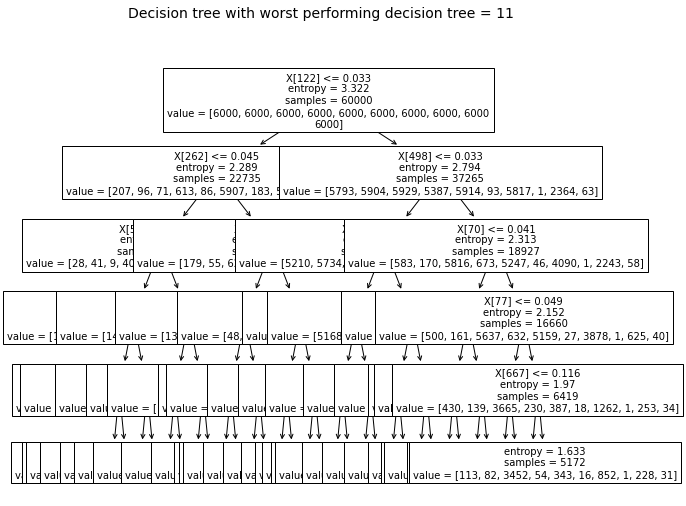

In [ ]:
# For part 4

worst_performing = accuracy_list.index(min(accuracy_list[4:]))
print('Accuracy: ', accuracy_list[worst_performing], end = '\n\n')
print('The worst performing decision tree of depth of at least 5 and at most 20 is depth', worst_performing+1)

fig, ax = plt.subplots(figsize=(8,8))
tree.plot_tree(model_list[worst_performing], fontsize=10)
fig.suptitle('Decision tree with worst performing decision tree = {}'.format(best_performing+1), fontsize=14)

cm = confusion_matrix(y_test, model_list[worst_performing].predict(x_test))
print('Confusion matrix:\n', cm)

In [ ]:
# Setting up for part 5 and 6
accuracy_list = []
model_list = []
for max_depth in range(1, 21):
  model = DecisionTreeClassifier(criterion='gini',max_depth=max_depth)
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  accuracy_list.append(accuracy_score(y_test, pred))
  model_list.append(model)

In [ ]:
# To check the answers for part 5 and 6
print(accuracy_list)

[0.1992, 0.3543, 0.4988, 0.6446, 0.6938, 0.72, 0.7555, 0.7817, 0.7982, 0.8017, 0.8065, 0.8038, 0.812, 0.8106, 0.8089, 0.8054, 0.8023, 0.8019, 0.794, 0.7961]


Accuracy:  0.812

The best performing decision tree of depth of 20 or less is  13
Confusion matrix:
 [[784   6  20  33  11   1 134   1   8   2]
 [  3 948   6  24   7   0   9   0   1   2]
 [ 17   1 692  17 168   0  91   0  11   3]
 [ 45  20  23 799  67   0  36   1   9   0]
 [  5   1 138  43 717   0  95   0   0   1]
 [  0   3   1   0   1 887   0  56  22  30]
 [147   6 145  33 110   2 538   1  16   2]
 [  1   0   0   0   0  34   0 916   5  44]
 [  5   5  17   6   5  11  24   6 918   3]
 [  1   0   1   0   1  15   0  57   4 921]]


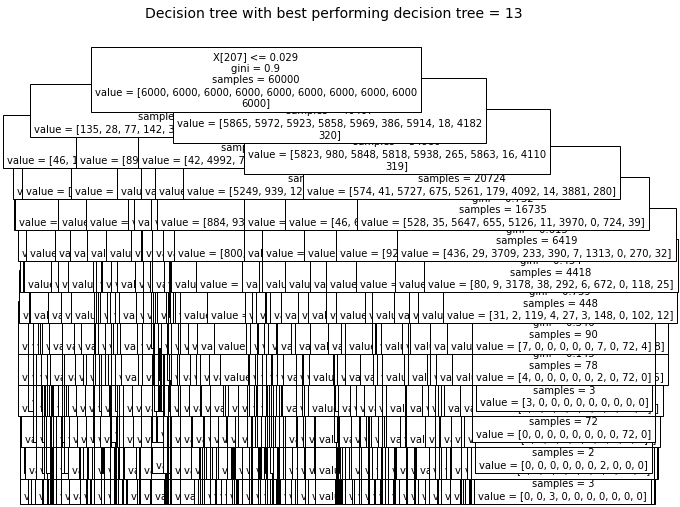

In [ ]:
# For part 5

best_performing = accuracy_list.index(max(accuracy_list))
print('Accuracy: ', accuracy_list[best_performing], end = '\n\n')
print('The best performing decision tree of depth of 20 or less is ', best_performing+1)

fig, ax = plt.subplots(figsize=(8,8))
tree.plot_tree(model_list[best_performing], fontsize=10)
fig.suptitle('Decision tree with best performing decision tree = {}'.format(best_performing+1), fontsize=14)

cm = confusion_matrix(y_test, model_list[best_performing].predict(x_test))
print('Confusion matrix:\n', cm)

Accuracy:  0.6938

The worst performing decision tree of depth of at least 5 and at most 20 is depth 5
Confusion matrix:
 [[625   2  88 150  19   8  90   1  14   3]
 [  0 803   6 184   3   3   0   0   0   1]
 [ 11   0 600  11 349  13   1   0  14   1]
 [ 22   2  52 803  85  28   4   0   4   0]
 [  2   1 107  87 776   2   3   0  21   1]
 [  0   1   1  21   0 799   0 110  17  51]
 [101   0 219 143 427  10  72   0  26   2]
 [  0   0   1   0   0  89   0 823   3  84]
 [  0   2  63  31  75  31   1  25 757  15]
 [  0   0   5   1   1  34   0  75   4 880]]


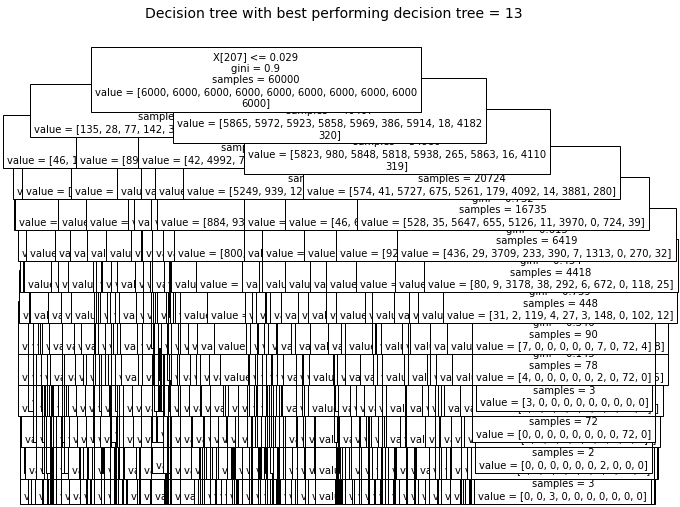

In [ ]:
# For part 6

worst_performing = accuracy_list.index(min(accuracy_list[4:]))
print('Accuracy: ', accuracy_list[worst_performing], end = '\n\n')
print('The worst performing decision tree of depth of at least 5 and at most 20 is depth', worst_performing+1)

fig, ax = plt.subplots(figsize=(8,8))
tree.plot_tree(model_list[best_performing], fontsize=10)
fig.suptitle('Decision tree with best performing decision tree = {}'.format(best_performing+1), fontsize=14)

cm = confusion_matrix(y_test, model_list[worst_performing].predict(x_test))
print('Confusion matrix:\n', cm)

## Submission Instructions

1. File > Download .ipynb
2. Go to Blackboard, find the submission page, and upload the .ipynb file you just downloaded.